In [9]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

import glob
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr


from uwtrajectory import unified_traj_data as traj
from uwtrajectory import config, utils
from uwtrajectory.ERA5.add_to_trajectory import add_ERA_ens_to_trajectory, \
    add_ERA_sfc_to_trajectory, add_ERA_to_trajectory, add_advection_to_trajectory

%load_ext autoreload
%autoreload 2
print('banana')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
banana


In [4]:

backtraj_files = sorted(glob.glob('/home/disk/eos4/jkcm/Data/CSET/profile_backtrajectories/new/profile_backtraj_*.nc'))
print(len(backtraj_files))
for i, bt in enumerate(backtraj_files):
    print(i)
    ds = xr.open_dataset(bt)
#     era_vars = [i for i in ds.data_vars.keys() if 'ERA_' in i] + ['level', 'ens_level']
#     ds = ds.drop(era_vars)
#     ds = add_ERA_to_trajectory(ds)
#     ds = add_advection_to_trajectory(ds)
#     ds = add_ERA_sfc_to_trajectory(ds)
    ds = add_ERA_ens_to_trajectory(ds)
    ds.to_netcdf(f'/home/disk/eos4/jkcm/Data/CSET/profile_backtrajectories/newer/{os.path.basename(bt)}')

28
0


KeyError: 'number'

In [11]:
    
    lats, lons, times = ds.lat.values, ds.lon.values, ds.time.values
#     space_index = int(np.round(box_degrees/0.25/2)) # go up/down/left/right this many pixels
    
    
    unique_days = set([utils.as_datetime(i).date() for i in times])
    ens_files = [os.path.join(config.ERA_ens_source, config.ERA_ens_fmt.format(i)) for i in unique_days]
    data = xr.open_mfdataset(sorted(ens_files), combine='by_coords')


In [15]:
data.cc

<xarray.DataArray 'cc' (time: 24, level: 37, latitude: 121, longitude: 101)>
dask.array<concatenate, shape=(24, 37, 121, 101), dtype=float32, chunksize=(8, 37, 121, 101), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -160.0 -159.5 -159.0 ... -111.0 -110.5 -110.0
  * latitude   (latitude) float32 60.0 59.5 59.0 58.5 58.0 ... 1.5 1.0 0.5 0.0
  * level      (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * time       (time) datetime64[ns] 2015-07-05 ... 2015-07-07T21:00:00
Attributes:
    long_name:  Fraction of cloud cover
    units:      (0 - 1)

In [30]:
ds = xr.open_dataset(backtraj_files[0])
era_vars = [i for i in ds.data_vars.keys() if 'ERA_' in i] + ['level', 'ens_level']
ds = ds.drop(era_vars)

In [31]:
ds

<xarray.Dataset>
Dimensions:                                     (AMSR_prcp_pctile: 9, lev: 72, number: 10, time: 49)
Coordinates:
  * time                                        (time) datetime64[ns] 2015-07-05T15:00:00 ... 2015-07-07T15:00:00
  * number                                      (number) int32 0 1 2 3 ... 7 8 9
  * lev                                         (lev) float64 0.01 ... 985.0
  * AMSR_prcp_pctile                            (AMSR_prcp_pctile) float64 10.0 ... 90.0
Data variables:
    fhour                                       (time) timedelta64[ns] ...
    lat                                         (time) float64 ...
    lon                                         (time) float64 ...
    height                                      (time) float64 ...
    pres                                        (time) float64 ...
    traj_u                                      (time) float64 ...
    traj_v                                      (time) float64 ...
    traj_hdg   

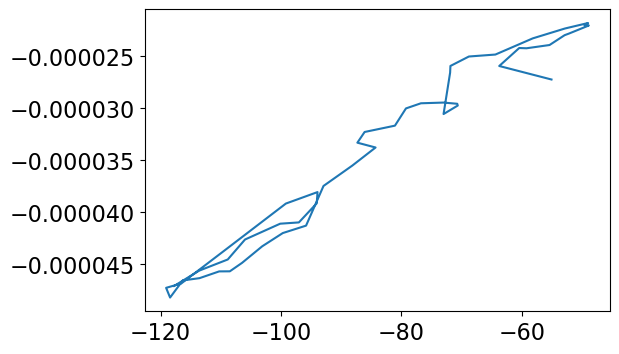

In [16]:
plt.plot(ds.ERA_slhf.values/3600, ds.ERA_ie.values)

In [17]:
ds.ERA_ie

<xarray.DataArray 'ERA_ie' (time: 49)>
array([-2.724488e-05, -2.594692e-05, -2.421897e-05, -2.424343e-05,
       -2.393070e-05, -2.298568e-05, -2.282879e-05, -2.205343e-05,
       -2.204844e-05, -2.181567e-05, -2.234425e-05, -2.329199e-05,
       -2.484631e-05, -2.503495e-05, -2.594303e-05, -2.658411e-05,
       -3.056368e-05, -2.974617e-05, -2.957596e-05, -2.946133e-05,
       -2.952939e-05, -3.002301e-05, -3.167895e-05, -3.228680e-05,
       -3.331551e-05, -3.377781e-05, -3.550853e-05, -3.747256e-05,
       -4.128512e-05, -4.199910e-05, -4.326945e-05, -4.486034e-05,
       -4.567503e-05, -4.568280e-05, -4.633157e-05, -4.655214e-05,
       -4.819564e-05, -4.726168e-05, -4.685052e-05, -4.383290e-05,
       -3.916504e-05, -3.806198e-05, -3.913801e-05, -4.097628e-05,
       -4.109895e-05, -4.261887e-05, -4.453830e-05, -4.561173e-05,
       -4.708036e-05])
Coordinates:
  * time     (time) datetime64[ns] 2015-08-05T18:00:00 ... 2015-08-07T18:00:00
Attributes:
    units:      kg m**-2 s**-1